# What is the best market to advertise our products?

Our company has a variety of courses that goes from web and mobile designt to data science and game development. In case to attract more students we need to advertise our company and courses, but what market is the best one to do that?

Our goal with this project is find the two best markets to advertise our product in

As organazing surveys is very costly we are going to use freeCodeCamp's 2007 New Coder Survey wich is available in this [GitHub Repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [2]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [3]:
survey.shape

(18175, 136)

In [4]:
for col in survey.columns:
    print(col)

Age
AttendedBootcamp
BootcampFinish
BootcampLoanYesNo
BootcampName
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventConferences
CodeEventDjangoGirls
CodeEventFCC
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWkdBootcamps
CodeEventWomenCode
CodeEventWorkshops
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
FirstDevJob
Gender
GenderOther
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDisabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec


We are using this data because making a new survey is expensive, even if we made it ourselfs on google. Also the data is already available and it has more than 18000 answers wich is a huge amount of answers.

The dataset is the union of two surveys, one demographic and the other is about personal experience in coding and the different places and resources used to be a coder

There's 136 columns, so we need to select the ones that are most important for our analysis. To select those columns we use the next questions:

* Where are these new coders located?
* What are the locations with the greatest number of new coders?
* How much money new coders are willing to spend on learning?


## Is the sample representative for our population of interest?

One of the first things we need to do is to find if the sample we have is representative for our population of interest. To answer this we use de JobRoleInterest column

In [5]:
survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                                                  2.030892
  Mobile Developer                  

The information in the table is granular but we can find interesting things here:
* most of the people in the survey are interested in web development (full-stack, front-end and back-end)
* There's a interest for Data Science
* Few people is interested in Mobile development

Now let's see if people are interested in one or more topics

In [6]:
print(survey['JobRoleInterest'].shape)

(18175,)


In [7]:
jobroleinterest = survey['JobRoleInterest'].copy()
jobroleinterest.dropna(inplace=True)
jobroleinterest.shape

(6992,)

To do a good analysis of this column we copy the column to not modify the original dataset and dropped all the NaN columns, that reduced the amount of columns from 18175 to 6992

In [8]:
topics = jobroleinterest.tolist()
topics = [x.split(',') for x in topics]

amount = {}
for x in topics:
    if len(x) == 1:
        if 'one_topic' not in amount:
            amount['one_topic'] = 1
        else:
            amount['one_topic'] += 1
    elif len(x) == 2:
        if 'two_topic' not in amount:
            amount['two_topic'] = 1
        else:
            amount['two_topic'] += 1
    elif len(x) == 3:
        if 'three_topic' not in amount:
            amount['three_topic'] = 1
        else:
            amount['three_topic'] += 1
    else:
        if 'more_topic' not in amount:
            amount['more_topic'] = 1
        else:
            amount['more_topic'] += 1
        
for key,val in amount.items():
    amount[key] = val/6992
    
for key,val in amount.items():
    print(key, ':', round(val*100, 2))

three_topic : 15.89
two_topic : 10.88
one_topic : 31.65
more_topic : 41.58


We found that only 31.6% of the people in the survey are interested in one topic. Most of them are interested in more than 3 topics. One possible reason of this is that most people don't have a clear idea of what or why they want to learn to code

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


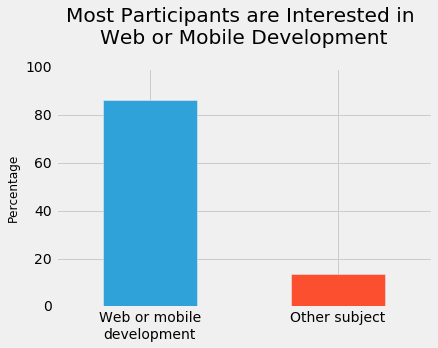

In [9]:
web_or_mobile = survey.JobRoleInterest.str.contains(
    'Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) 
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

It turns out that most of the people are interested in Web or Mobile development. As our website focus is in this two topics, the sample is representative and we can continue to use this dataset

## Demographics

### Where do coders live?

The first thing to do here is drop all the rows were participants did not answer what role they are interested in, this because we can't know what their interest are

In [13]:
survey_clean = survey[survey.JobRoleInterest.notnull()].copy()

absolute = survey_clean['CountryLive'].value_counts()
relative = survey_clean['CountryLive'].value_counts(normalize=True)*100

pd.DataFrame(data={'Absolute Frequency': absolute,
                  'Relative Frequency': relative})

,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45.7% of the possible users are located in the United States, they are followed by 7% from India, 4% from UK and 3.8% from Canada. However we need to find how much money people are willing to pay for a course

### Are coders in these countries available to pay our suscription fee?

First we are going to replace those answers where people answer that they were learning to code for 0 months to avoid dividing by 0. Then we group by country to find out how much money a student spends on average each month in the US, India, UK and Canada

In [26]:
survey_clean['MonthsProgramming'].replace(0, 1, inplace=True)
survey_clean['MoneyAvailable'] = survey_clean['MoneyForLearning'] / survey_clean['MonthsProgramming']
survey_clean['MoneyAvailable'].isnull().sum()

0

In [27]:
country_mean = survey_clean.groupby('CountryLive').mean()

country_mean['MoneyAvailable'][['United States of America',
                               'India', 'United Kingdom',
                                'Canada']]

CountryLive
United States of America    236.546913
India                       136.874737
United Kingdom               46.878633
Canada                      115.434876
Name: MoneyAvailable, dtype: float64

Our suscription cost $59 per month, that means that we can focus on every country except the United Kingdom. However when we do a deep analysis and compare how much money they're willing to spend on education and compare with social-economic metrics like GDP we find that the values for India, Canada and UK are weird.

UK and Canada have a higher GDP than India, that means that people in UK and Canada are expected to spend more money than people from India.

There might be different reasons for this, the sample could not be representative for UK and Canada or there might be outliers making the mean to high for India or too low for Canada and UK

### Finding outliers

The best way to see if there's outliers in the data is with a box plot

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f165cc56fd0>,
 <a list of 4 Text xticklabel objects>)

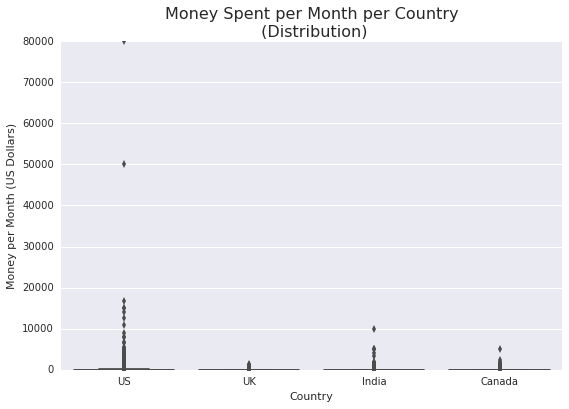

In [40]:
big_four = survey_clean[survey_clean['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada', na=False)]

sns.boxplot(y = 'MoneyAvailable', x = 'CountryLive', 
            data = big_four)
plt.title('Money Spent per Month per Country\n (Distribution)',
         fontsize = 16)
plt.ylabel('Money per Month (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

Is hard to see this graphic, and we can't see anything about the countries of interest. That's because two people in the US reported a spend on education above \$50000 wich is possible but not realistic, if you think about virtual education. A considerable value to filter the data is \$20000

In [42]:
survey_clean = survey_clean[survey_clean['MoneyAvailable'] < 20000]

#Computing the mean again
countries_mean = survey_clean.groupby('CountryLive').mean()
countries_mean['MoneyAvailable'][['United States of America',
                                  'United Kingdom', 'Canada',
                                 'India']]

CountryLive
United States of America    190.696680
United Kingdom               46.878633
Canada                      115.434876
India                       136.874737
Name: MoneyAvailable, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f165cac8860>,
 <a list of 4 Text xticklabel objects>)

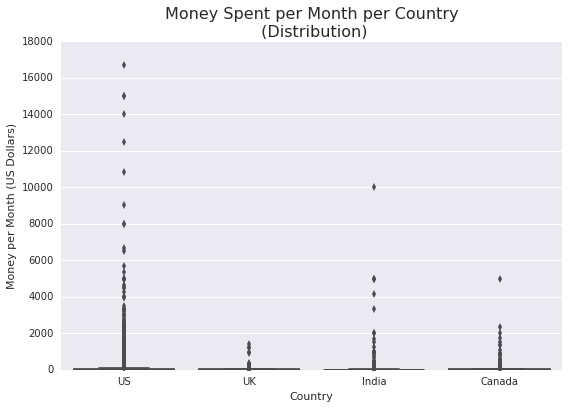

In [45]:
big_four = survey_clean[survey_clean['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada', na=False)]
sns.boxplot(y = 'MoneyAvailable', x = 'CountryLive', 
            data = big_four)
plt.title('Money Spent per Month per Country\n (Distribution)',
         fontsize = 16)
plt.ylabel('Money per Month (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

Most outliers are in the US. However for India we see that few extreme outliers are above \$2000, and still isn't clear why. Maybe some students went to several bootcamps wich are quite expensive. Let's see in the data these two data points to see if we can find an explanation

In [46]:
india_outliers = big_four[(big_four['CountryLive'] == 'India') &
                         (big_four['MoneyAvailable'] > 2000)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyAvailable
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN

It's also hard to see anything here but there's some information that's interesting. First none of these went to a bootcamp, but everyone wrote exorbitant values in the column MoneyForLearning, looking at the original data in GitHub we found that the question for this column was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", we can assume that they misunderstood this question and thought university tuition is included. So it's better to remove these two rows

In [47]:
big_four = big_four.drop(india_outliers.index)

Looking at the box plot we see that the US have extreme outliers over \$6000, let's do the same analysis that we did with India

In [48]:
us_outliers = big_four[(big_four['CountryLive'] == 'United States of America') &
                         (big_four['MoneyAvailable'] > 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyAvailable
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In the US we have 6 persons who went to at least one BootCamp, but when we look at the MoneyForLearning column we find the same trend that we found in India, even in rows where the person did not go to a BootCamp.

Also 8 of them were coding for less than 3 months at the moment of answering the survey, so they might have paid a huge amount of money to assist to a bootcamp that last several months.

So we will remove (from the us data) the next respondents:
* Didn't attend bootcamps
* Had been coding for less than 3 months

In [49]:
no_bootcamp = big_four[
    (big_four['CountryLive'] == 'United States of America') &
    (big_four['MoneyAvailable'] >= 6000) &
    (big_four['AttendedBootcamp'] == 0.0)
]

big_four = big_four.drop(no_bootcamp.index)

less_than_3_months = big_four[
    (big_four['CountryLive'] == 'United States of America') &
    (big_four['MoneyAvailable'] >= 6000) &
    (big_four['MonthsProgramming'] <= 3)
]

big_four = big_four.drop(less_than_3_months.index)

Canada also has one extreme outlier, a person that expends over \$4000 per month

In [52]:
canada_outliers = big_four[(big_four['CountryLive'] == 'Canada') &
                         (big_four['MoneyAvailable'] > 4000)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyAvailable
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


It's the same case than the US, this person hasn't been coding for more than 2 months, and it's assisting to a bootcamp, and might not expend more money in the next months. Again it's better to drop this row too

In [53]:
big_four = big_four.drop(canada_outliers.index)

After finding and droping the outliers, let's recompute the mean values and the box plot again 

In [54]:
big_four.groupby('CountryLive').mean()['MoneyAvailable']

CountryLive
Canada                       94.649492
India                        66.633602
United Kingdom               46.878633
United States of America    148.028236
Name: MoneyAvailable, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7f165ca2fb70>,
 <a list of 4 Text xticklabel objects>)

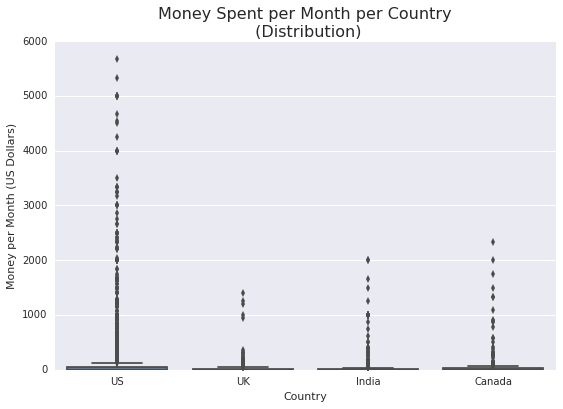

In [55]:
sns.boxplot(y = 'MoneyAvailable', x = 'CountryLive', 
            data = big_four)
plt.title('Money Spent per Month per Country\n (Distribution)',
         fontsize = 16)
plt.ylabel('Money per Month (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])

## Choosing the best two markets

According to the results, the US and Canada are the best markets, according to the survey, people in the US can easily pay a suscription of \$59 per month same with Canada, and our suscription value is a little bit close to what a person in India might be able to pay, but let's analyze that more deeply. India has way more population than Canada, so it's Canada really the second best market?

To answer that let's see how many people answered the survey in Canada and India

In [59]:
print(big_four['CountryLive'].value_counts())
print('\n')
print(big_four['CountryLive'].value_counts(normalize=True)*100)

United States of America    2814
India                        451
United Kingdom               271
Canada                       235
Name: CountryLive, dtype: int64


United States of America    74.622116
India                       11.959692
United Kingdom               7.186423
Canada                       6.231769
Name: CountryLive, dtype: float64


Just in the survey there's more people interested in different coding programs in India than Canada, but it's a difference of 5.72% so it's not really big. In the end it's not crystal clear what market is better. Even if we know that people in Canada has more oportunities to enter a College than people in India.

But there's different ways to make this work, for example:
1. Invest in US, India and Canada
  * Invest 60% in US, 20% in India and 20% in Canada
  * Invest 60% in US, 25% in India and 15% in Canada

2. Invest in US and India or US and Canada
  * Invest 70% in US, 30% in Canada
  * Invest 65% in US 35% in India
  
3. Invest only in the US

The marketing team might have a better answer for this, and the better choice right now is send this information to them

## Conclusion

We use data from the freeCodeCamp New Coders Survey from 2017 to find the best markets in wich we should focus to get more users. However we only can conclude that the main market should be the US. For the second market we have a similarity in the values between India and Canada and the marketing team should use their domain knowledge to take the best decision.